# US Visa Prediction Project
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

### About
The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. 
The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

## 1) Problem statement.

* OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications. 
* As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project we are going to use the data given to build a Classification model:**

* This model is to check if Visa get approved or not based on the given dataset.
* This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

## 2) Data Collection.
* The Dataset is part of Office of Foreign Labor Certification (OFLC)
* The data consists of 25480 Rows and 12 Columns

https://www.kaggle.com/datasets/moro23/easyvisa-dataset

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [59]:
df = pd.read_csv('visaDataset.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [60]:
print(df.shape)
df.describe()

(25480, 12)


,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## 3. EXPLORING DATA

In [62]:
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [63]:
df.duplicated().sum()

np.int64(0)

In [64]:
#unique values in each column
[f"{col} : {df[col].unique()}" for col in df.columns]

["case_id : ['EZYV01' 'EZYV02' 'EZYV03' ... 'EZYV25478' 'EZYV25479' 'EZYV25480']",
 "continent : ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']",
 'education_of_employee : [\'High School\' "Master\'s" "Bachelor\'s" \'Doctorate\']',
 "has_job_experience : ['N' 'Y']",
 "requires_job_training : ['N' 'Y']",
 'no_of_employees : [14513  2412 44444 ... 24335 48785 40224]',
 'yr_of_estab : [2007 2002 2008 1897 2005 2012 1994 1924 1995 2004 1963 2006 1987 1991\n 2001 1972 2013 1968 1884 1981 1997 2009 1998 1880 2000 2010 1965 1909\n 2011 1989 1933 1960 2003 1976 1996 1847 1935 1890 1999 1838 1947 1939\n 1970 1977 1982 1943 1956 1864 1974 1985 1984 1971 1913 1969 1818 1839\n 1914 1988 1944 1855 1975 1966 1801 1920 1925 1993 1992 1979 1986 1931\n 1962 1954 1868 1859 1946 1950 1869 1917 2014 1980 1896 1949 1843 1850\n 1906 1961 1951 1958 1912 1983 1948 1945 1978 1898 1923 1911 1851 1865\n 1849 1872 1967 1926 1873 1848 2015 1889 1876 1852 1938 1973 1959 1927\n 1990 1930 1922 1

In [65]:
#number of unique values in each column
[f"{col} : {df[col].nunique()}" for col in df.columns]

['case_id : 25480',
 'continent : 6',
 'education_of_employee : 4',
 'has_job_experience : 2',
 'requires_job_training : 2',
 'no_of_employees : 7105',
 'yr_of_estab : 199',
 'region_of_employment : 5',
 'prevailing_wage : 25454',
 'unit_of_wage : 4',
 'full_time_position : 2',
 'case_status : 2']

In [66]:
df[df['no_of_employees']<0].head()
#how no_of_employees has negative values

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.99,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.14,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.94,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.46,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.97,Hour,Y,Denied


In [67]:
numeric_cols = [col_name for col_name in df.columns if df[col_name].dtype != 'O']
categoric_cols = [col_name for col_name in df.columns if df[col_name].dtype == 'O']

print(f"We have {len(numeric_cols)} numerical cols : {numeric_cols}")
print(f"We have {len(categoric_cols)} categorical cols : {categoric_cols}")


We have 3 numerical cols : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
We have 9 categorical cols : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [68]:
# proportion of count data on categorical columns
for col in categoric_cols:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

case_id
EZYV25480    0.003925
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
               ...   
EZYV12       0.003925
EZYV13       0.003925
EZYV14       0.003925
EZYV15       0.003925
EZYV16       0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------
region_of_employment
Northeast    2

Insights:
-case id column has the same proportion for all rows, means that it gets no importance
-most of the employees are coming from Asia
-the unit wage is mostly yearly contracts

### Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

#### Numerical Features

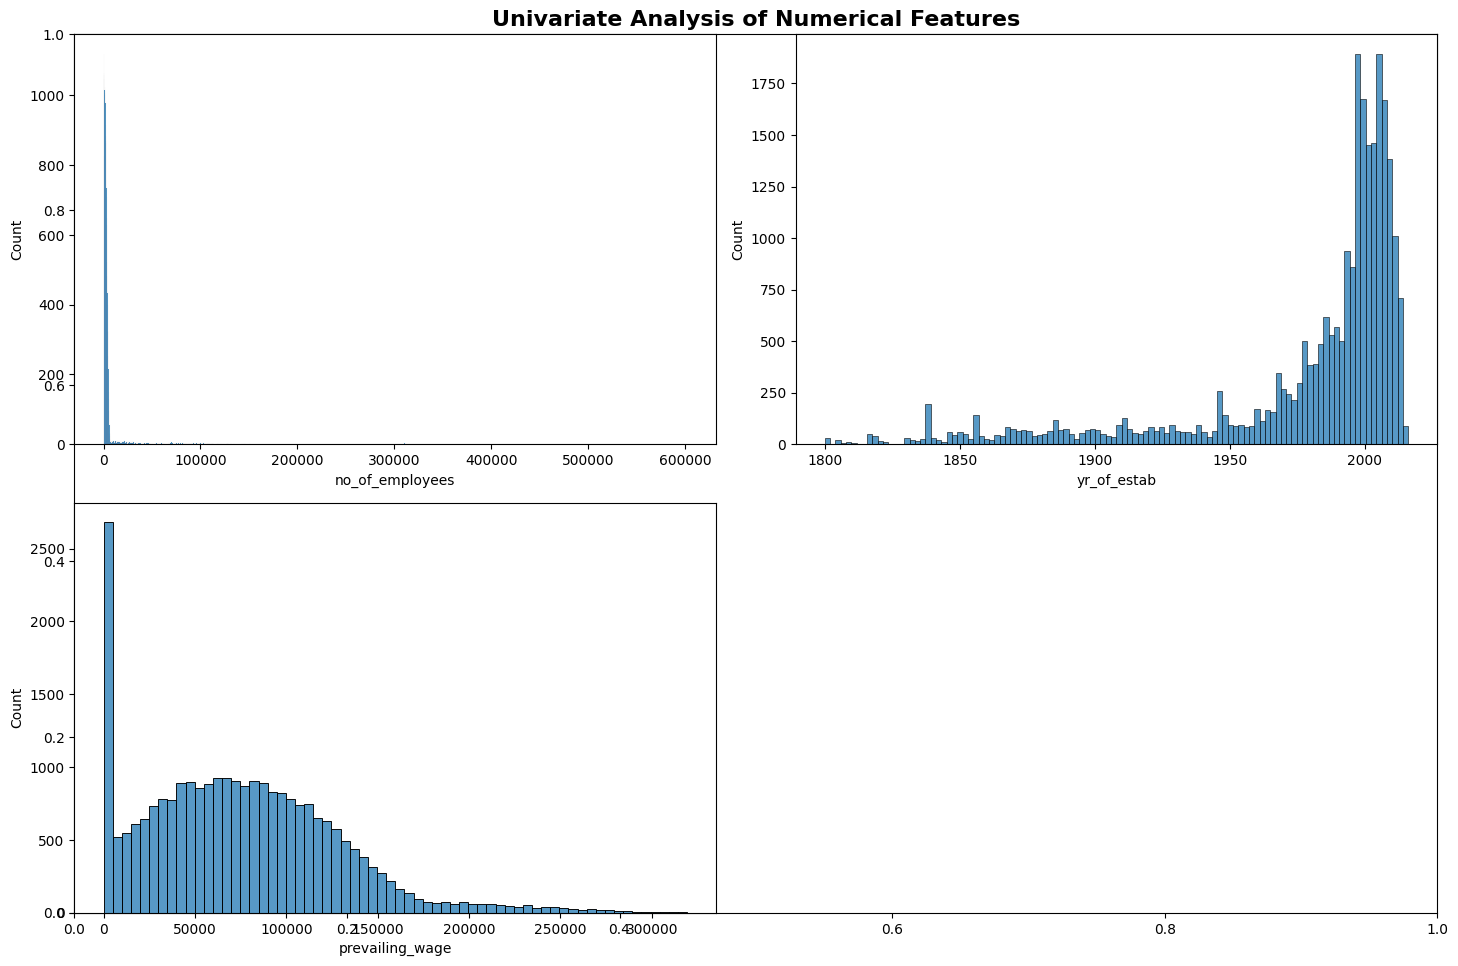

In [69]:
plt.figure(figsize=(15,10))
plt.title('Univariate Analysis of Numerical Features', fontsize=16, fontweight='bold')
for i, col in enumerate(numeric_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(df[col])
    plt.tight_layout()

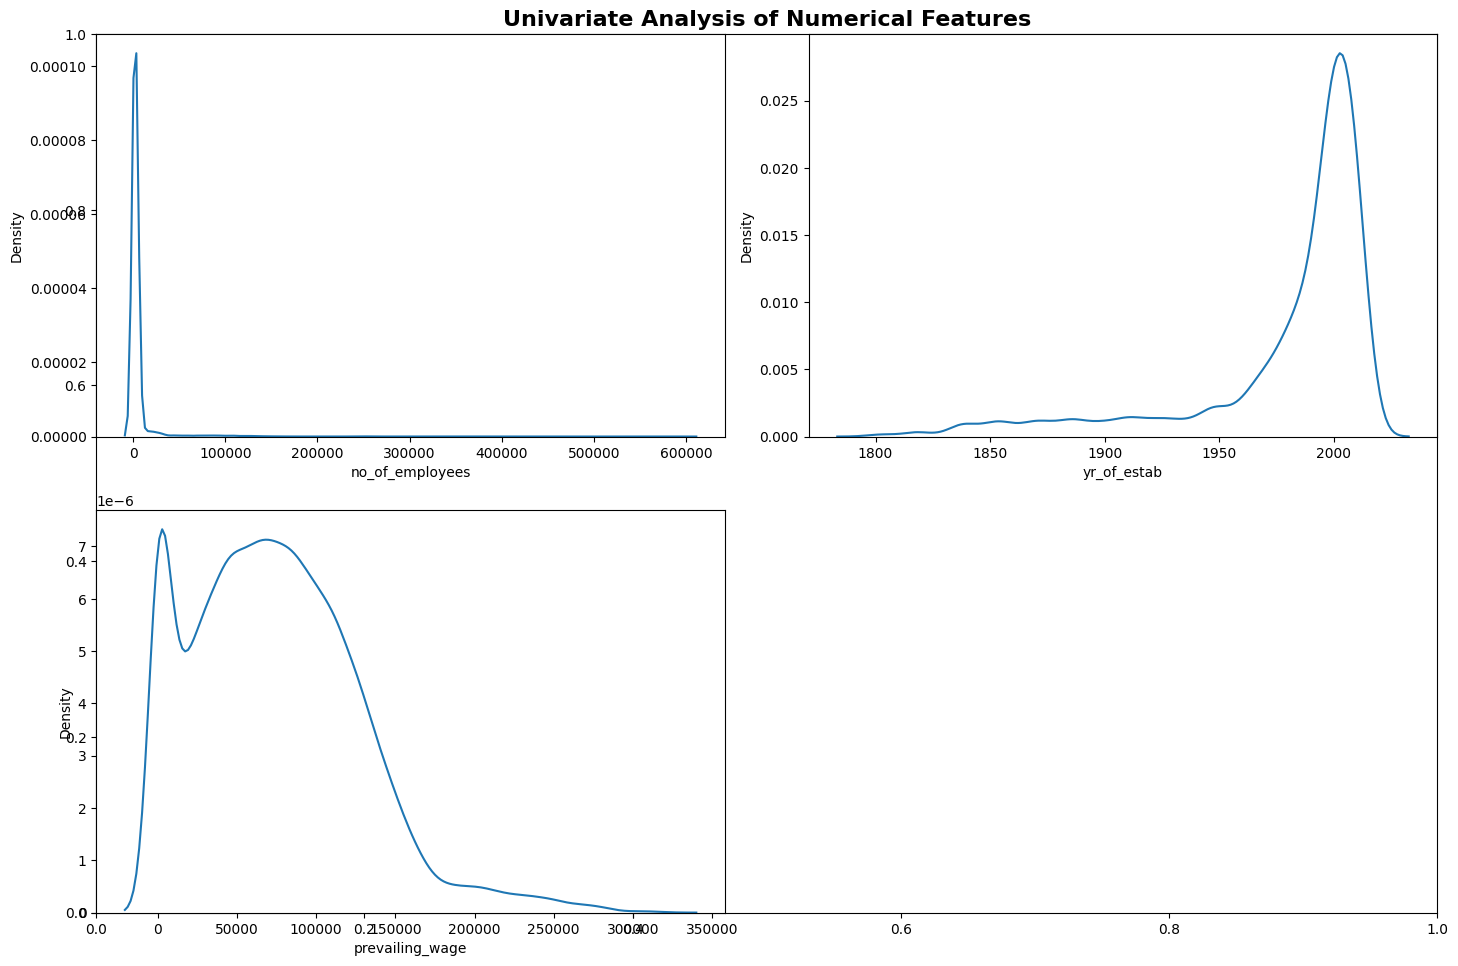

In [70]:
plt.figure(figsize=(15,10))
plt.title('Univariate Analysis of Numerical Features', fontsize=16, fontweight='bold')
for i, col in enumerate(numeric_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(df[col])
    plt.tight_layout()

**Insights**
 - `no_of_employees` column looks more skewed but it may be because of outlies.
 - `yr_of_estab` is a discrete feature.
 - `privailing-wage` is a right-skewed distribution.

#### Categorical Features

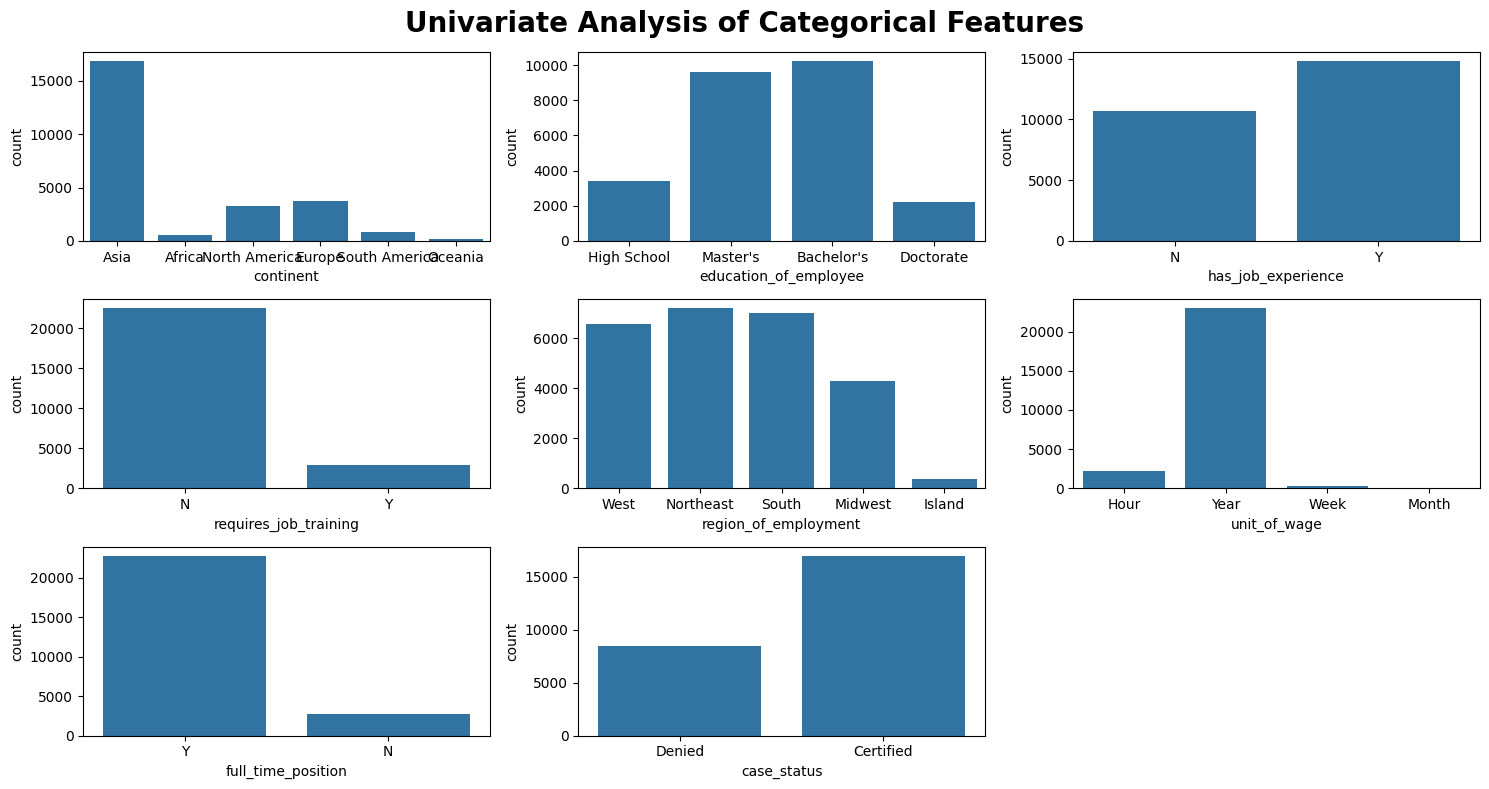

In [71]:
categoric_cols.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold')

for i in range(0, len(categoric_cols)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categoric_cols[i]])
    plt.xlabel(categoric_cols[i])
    plt.tight_layout()
    

**Insights**
 - `requires_job_training`, `unit_of_wage`, `full_time_position` and `continent` columns have single category dominating.
 -  rest of the columns are balanced.

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

#### Check Multicollinearity in Numerical features

Multicollinearity is used to check how features are correlated to each other.

In [74]:
df[numeric_cols].corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


There is no multicollinearity

#### Check Multicollinearity in Categorical features

In [75]:
df[categoric_cols]

,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,West,Hour,Y,Denied
1,Asia,Master's,Y,N,Northeast,Year,Y,Certified
2,Asia,Bachelor's,N,Y,West,Year,Y,Denied
3,Asia,Bachelor's,N,N,West,Year,Y,Denied
4,Africa,Master's,Y,N,South,Year,Y,Certified
...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,South,Year,Y,Certified
25476,Asia,High School,Y,N,Northeast,Year,Y,Certified
25477,Asia,Master's,Y,N,South,Year,N,Certified
25478,Asia,Master's,Y,Y,West,Year,Y,Certified


In [82]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r-1, k-1))))

In [83]:
chi2_test = []
versus = []
cramers = []
data = df[categoric_cols]
for i in range(len(categoric_cols)):
    for j in range(i+1, len(categoric_cols)):
        f1 = categoric_cols[i]
        f2 = categoric_cols[j]
        versus.append(f"{f1} vs {f2}")
        cramers.append(cramers_v(df[f1], df[f2]))

        if chi2_contingency(pd.crosstab(df[f1], df[f2]))[1] < 0.05:
            chi2_test.append('Dependent')
        else:
            chi2_test.append('Independent')
            
result = pd.DataFrame(data=[versus, chi2_test, cramers]).T
result.columns = ['Versus', 'Hypothesis Result', 'Cramers V']
result

,Versus,Hypothesis Result,Cramers V
0,continent vs education_of_employee,Dependent,0.129665
1,continent vs has_job_experience,Independent,0.015763
2,continent vs requires_job_training,Dependent,0.11961
3,continent vs region_of_employment,Dependent,0.087429
4,continent vs unit_of_wage,Dependent,0.081006
5,continent vs full_time_position,Dependent,0.133307
6,continent vs case_status,Dependent,0.117433
7,education_of_employee vs has_job_experience,Independent,0.013796
8,education_of_employee vs requires_job_training,Dependent,0.087645
9,education_of_employee vs region_of_employment,Dependent,0.074305


- Correlation between features are not too high according to cramer's values, that's good.
- We get correlation with the target feature, that's also good. Only requires_job_training is not dependent to case_status.

#### Distribution of numerical features by case status

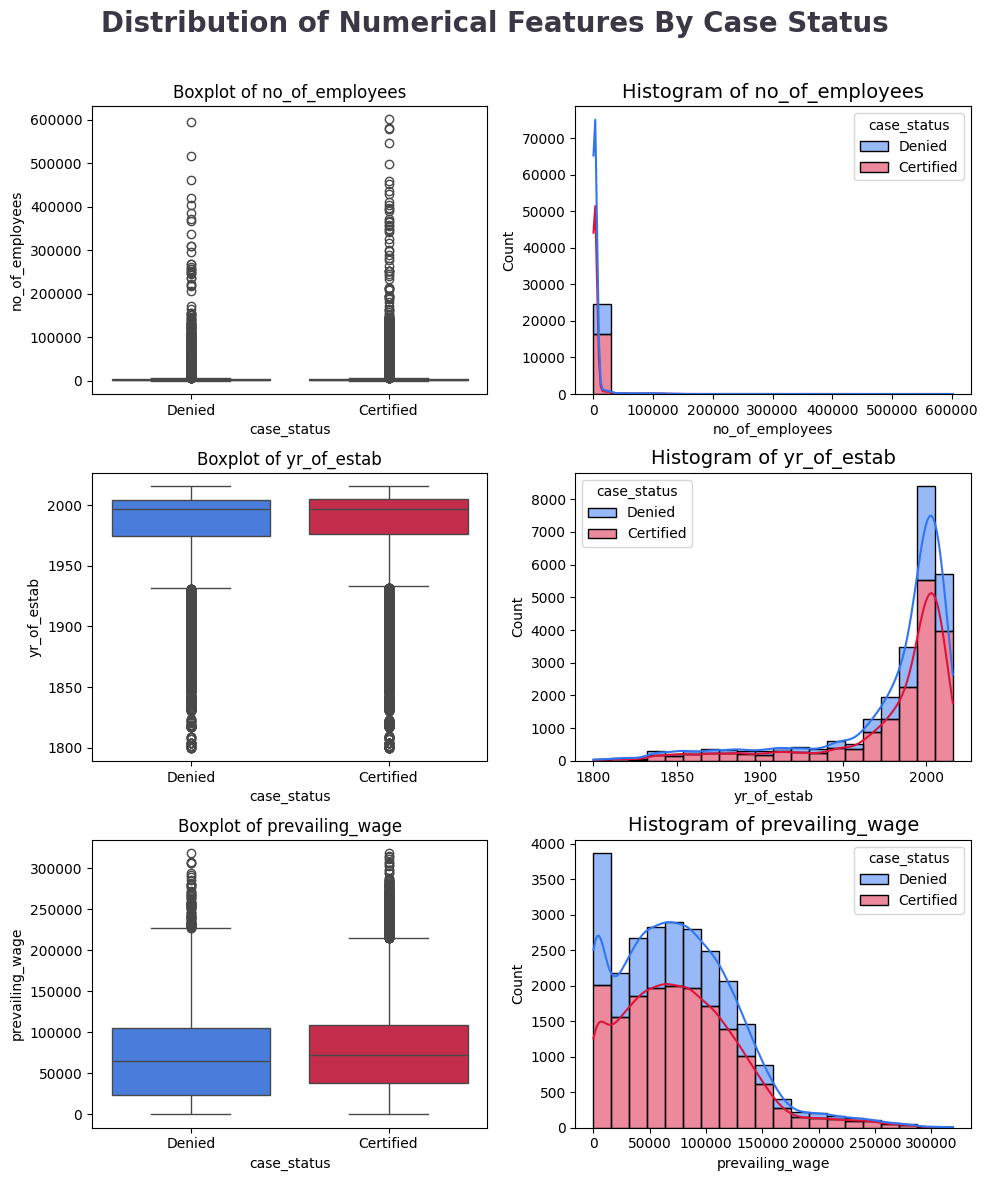

In [85]:
clr1 = ["#3175F3", '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(numeric_cols):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)